In [4]:
files <- list.files("data")
all <- rep(list(NA),length(files))
for(i in 1:length(files)){
  f <- read.csv(paste("data/",files[i],sep=""),stringsAsFactors = F)
  all[[i]] <- f
}
Heart<-as.data.frame(do.call(rbind,all))
head(Heart)
library(dplyr)

RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,⋯,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
2448,1,195,39,106.0,70.0,0,0,26.97,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2448,1,209,52,121.0,66.0,0,0,NA,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
6238,2,250,46,121.0,81.0,0,0,28.73,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6238,2,260,52,105.0,69.5,0,0,29.43,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6238,2,237,58,108.0,66.0,0,0,28.50,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
9428,1,245,48,127.5,80.0,1,20,25.34,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
Heart2<-select(Heart,1:39,-HDLC,-LDLC,-contains("TIME"))
Heartcomp <- Heart2[complete.cases(Heart2), ]
length(unique(Heartcomp$RANDID))
complete <- rep(0,length(unique(Heartcomp$RANDID)))
tal <- 0
for (i in unique(Heartcomp$RANDID)){
    tal <- tal +1
    complete[tal] <- sum(Heartcomp$RANDID==i)==3
}

sum(is.element(Heartcomp$RANDID,unique(Heartcomp$RANDID)[complete==1]))
Heart.sub <- Heartcomp[is.element(Heartcomp$RANDID,unique(Heartcomp$RANDID)[complete==1]),]
head(Heart.sub)
dim(Heart.sub)
table(Heart.sub$PERIOD)

[1] 4213

[1] 4968

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,⋯,PREVHYP,PERIOD,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
3,6238,2,250,46,121,81.0,0,0,28.73,0,⋯,0,1,0,0,0,0,0,0,0,0
4,6238,2,260,52,105,69.5,0,0,29.43,0,⋯,0,2,0,0,0,0,0,0,0,0
5,6238,2,237,58,108,66.0,0,0,28.50,0,⋯,0,3,0,0,0,0,0,0,0,0
13,11263,2,228,43,180,110.0,0,0,30.30,0,⋯,1,1,0,0,0,1,1,0,1,1
14,11263,2,230,49,177,102.0,0,0,31.36,0,⋯,1,2,0,0,0,1,1,0,1,1
15,11263,2,220,55,180,106.0,0,0,31.17,1,⋯,1,3,0,0,0,1,1,0,1,1


[1] 4968   28


   1    2    3 
1656 1656 1656 

In [40]:
Heart.sub$SEX<-as.factor(Heart.sub$SEX)
Heart.sub$CURSMOKE<-as.factor(Heart.sub$CURSMOKE)
Heart.sub$DIABETES<-as.factor(Heart.sub$DIABETES)
Heart.sub$BPMEDS<-as.factor(Heart.sub$BPMEDS)
Heart.sub$RANDID<-as.factor(Heart.sub$RANDID)
Heart.sub$PREVCHD<-as.factor(Heart.sub$PREVCHD)
Heart.sub$PREVAP<-as.factor(Heart.sub$PREVAP)
Heart.sub$PREVMI<-as.factor(Heart.sub$PREVMI)
Heart.sub$PREVSTRK<-as.factor(Heart.sub$PREVSTRK)
Heart.sub$PREVHYP<-as.factor(Heart.sub$PREVHYP)
Heart.sub$DEATH<-as.factor(Heart.sub$DEATH)
Heart.sub$ANGINA<-as.factor(Heart.sub$ANGINA)
Heart.sub$HOSPMI<-as.factor(Heart.sub$HOSPMI)
Heart.sub$MI_FCHD<-as.factor(Heart.sub$MI_FCHD)
Heart.sub$ANYCHD<-as.factor(Heart.sub$ANYCHD)
Heart.sub$STROKE<-as.factor(Heart.sub$STROKE)
Heart.sub$CVD<-as.factor(Heart.sub$CVD)
Heart.sub$HYPERTEN<-as.factor(Heart.sub$HYPERTEN)
Heart.sub$PERIOD<-as.factor(Heart.sub$PERIOD)
str(Heart.sub)

'data.frame':	4968 obs. of  28 variables:
 $ RANDID  : Factor w/ 1656 levels "6238","11263",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ SEX     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 1 1 1 ...
 $ TOTCHOL : int  250 260 237 228 230 220 260 292 280 225 ...
 $ AGE     : int  46 52 58 43 49 55 52 58 64 43 ...
 $ SYSBP   : num  121 105 108 180 177 ...
 $ DIABP   : num  81 69.5 66 110 102 106 89 90 100 107 ...
 $ CURSMOKE: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ CIGPDAY : int  0 0 0 0 0 0 0 0 0 30 ...
 $ BMI     : num  28.7 29.4 28.5 30.3 31.4 ...
 $ DIABETES: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ BPMEDS  : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 1 1 1 ...
 $ HEARTRTE: int  95 80 80 77 120 86 76 85 92 93 ...
 $ GLUCOSE : int  76 86 71 99 86 81 79 81 82 88 ...
 $ educ    : int  2 2 2 2 2 2 1 1 1 1 ...
 $ PREVCHD : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PREVAP  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PREVMI  : Factor w/ 2 levels "0","1

In [79]:
Heart.1<-subset(Heart.sub,PERIOD=="1")
Heart.2<-subset(Heart.sub,PERIOD=="2")
Heart.3<-subset(Heart.sub,PERIOD=="3")
fullmodel1<-glm(DEATH~SEX+TOTCHOL+AGE+SYSBP+DIABP+CURSMOKE+CIGPDAY+BMI+DIABETES+BPMEDS+HEARTRTE+GLUCOSE+educ+
    PREVAP+PREVMI+PREVSTRK+HOSPMI+ANYCHD+STROKE+CVD+HYPERTEN,data=Heart.1,family = binomial)
fullmodel2<-glm(DEATH~SEX+TOTCHOL+AGE+SYSBP+DIABP+CURSMOKE+CIGPDAY+BMI+DIABETES+BPMEDS+HEARTRTE+GLUCOSE+educ+
    PREVAP+PREVMI+PREVSTRK+HOSPMI+ANYCHD+STROKE+CVD+HYPERTEN,data=Heart.2,family = binomial)
fullmodel3<-glm(DEATH~SEX+TOTCHOL+AGE+SYSBP+DIABP+CURSMOKE+CIGPDAY+BMI+DIABETES+BPMEDS+HEARTRTE+GLUCOSE+educ+
    PREVAP+PREVMI+PREVSTRK+HOSPMI+ANYCHD+STROKE+CVD+HYPERTEN,data=Heart.3,family = binomial)
backwards1<-step(fullmodel1)
backwards2<-step(fullmodel2)
backwards3<-step(fullmodel3)

Start:  AIC=1331.58
DEATH ~ SEX + TOTCHOL + AGE + SYSBP + DIABP + CURSMOKE + CIGPDAY + 
    BMI + DIABETES + BPMEDS + HEARTRTE + GLUCOSE + educ + PREVAP + 
    PREVMI + PREVSTRK + HOSPMI + ANYCHD + STROKE + CVD + HYPERTEN

           Df Deviance    AIC
- DIABP     1   1287.6 1329.6
- BMI       1   1287.6 1329.6
- PREVAP    1   1287.6 1329.6
- TOTCHOL   1   1287.6 1329.6
- PREVMI    1   1287.7 1329.7
- HOSPMI    1   1288.0 1330.0
- STROKE    1   1288.0 1330.0
- CIGPDAY   1   1288.1 1330.1
- GLUCOSE   1   1288.2 1330.2
- CURSMOKE  1   1288.3 1330.3
- HEARTRTE  1   1288.3 1330.3
- DIABETES  1   1288.8 1330.8
<none>          1287.6 1331.6
- PREVSTRK  1   1289.8 1331.8
- educ      1   1289.9 1331.9
- BPMEDS    1   1290.5 1332.5
- ANYCHD    1   1290.8 1332.8
- SYSBP     1   1291.2 1333.2
- HYPERTEN  1   1293.1 1335.1
- SEX       1   1299.8 1341.8
- CVD       1   1311.8 1353.8
- AGE       1   1365.9 1407.9

Step:  AIC=1329.59
DEATH ~ SEX + TOTCHOL + AGE + SYSBP + CURSMOKE + CIGPDAY + BMI + 
 

In [55]:
summary(backwards1)
summary(backwards2)
summary(backwards3)


Call:
glm(formula = DEATH ~ SEX + AGE + SYSBP + CURSMOKE + DIABETES + 
    BPMEDS + educ + ANYCHD + CVD + HYPERTEN, family = binomial, 
    data = Heart.1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9244  -0.5808  -0.3770  -0.2435   2.8333  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.145505   0.681508 -10.485  < 2e-16 ***
SEX2        -0.603343   0.152379  -3.959 7.51e-05 ***
AGE          0.084458   0.009617   8.782  < 2e-16 ***
SYSBP        0.012120   0.004082   2.969  0.00299 ** 
CURSMOKE1    0.349497   0.151503   2.307  0.02106 *  
DIABETES1    0.860456   0.452939   1.900  0.05747 .  
BPMEDS1      0.761559   0.455233   1.673  0.09435 .  
educ        -0.105356   0.067586  -1.559  0.11903    
ANYCHD1      0.524848   0.188622   2.783  0.00539 ** 
CVD1         1.222706   0.191522   6.384 1.72e-10 ***
HYPERTEN1   -0.464574   0.195752  -2.373  0.01763 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
glm(formula = DEATH ~ SEX + AGE + SYSBP + DIABP + CURSMOKE + 
    DIABETES + BPMEDS + HEARTRTE + educ + ANYCHD + CVD + HYPERTEN, 
    family = binomial, data = Heart.2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8840  -0.5760  -0.3696  -0.2344   2.8298  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.591003   0.950373  -7.987 1.38e-15 ***
SEX2        -0.733593   0.157328  -4.663 3.12e-06 ***
AGE          0.080635   0.010054   8.020 1.06e-15 ***
SYSBP        0.019773   0.005420   3.648 0.000264 ***
DIABP       -0.017227   0.009787  -1.760 0.078376 .  
CURSMOKE1    0.273546   0.154707   1.768 0.077034 .  
DIABETES1    0.651604   0.326200   1.998 0.045765 *  
BPMEDS1      0.752388   0.234829   3.204 0.001355 ** 
HEARTRTE     0.008522   0.005963   1.429 0.152993    
educ        -0.100222   0.068064  -1.472 0.140892    
ANYCHD1      0.482799   0.190272   2.537 0.011167 *  
CVD1         1.194369   0.193828   6.162 7.18e-


Call:
glm(formula = DEATH ~ SEX + AGE + SYSBP + CURSMOKE + BPMEDS + 
    HEARTRTE + GLUCOSE + PREVAP + STROKE + CVD + HYPERTEN, family = binomial, 
    data = Heart.3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6967  -0.5668  -0.3749  -0.2337   2.8976  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.787777   0.854452 -11.455  < 2e-16 ***
SEX2        -0.615795   0.151806  -4.056 4.98e-05 ***
AGE          0.085895   0.009854   8.716  < 2e-16 ***
SYSBP        0.012574   0.003887   3.235 0.001216 ** 
CURSMOKE1    0.388780   0.162453   2.393 0.016703 *  
BPMEDS1      0.425229   0.198959   2.137 0.032576 *  
HEARTRTE     0.008257   0.005810   1.421 0.155275    
GLUCOSE      0.007624   0.002298   3.318 0.000905 ***
PREVAP1      0.507055   0.222747   2.276 0.022824 *  
STROKE1     -0.455195   0.231970  -1.962 0.049727 *  
CVD1         1.650098   0.172271   9.579  < 2e-16 ***
HYPERTEN1   -0.669243   0.211336  -3.167 0.001542 ** 


In [56]:
library(Deducer)

Loading required package: ggplot2
Loading required package: JGR
Loading required package: rJava
Loading required package: JavaGD
Loading required package: iplots
Note: On Mac OS X we strongly recommend using iplots from within JGR.
Proceed at your own risk as iplots cannot resolve potential ev.loop deadlocks.
'Yes' is assumed for all dialogs as they cannot be shown without a deadlock,
also ievent.wait() is disabled.
More recent OS X version do not allow signle-threaded GUIs and will fail.


Please type JGR() to launch console. Platform specific launchers (.exe and .app) can also be obtained at http://www.rforge.net/JGR/files/.


Loading required package: car

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Note Non-JGR console detected:
	Deducer is best used from within JGR (http://jgr.markushelbig.org/).
	To Bring up

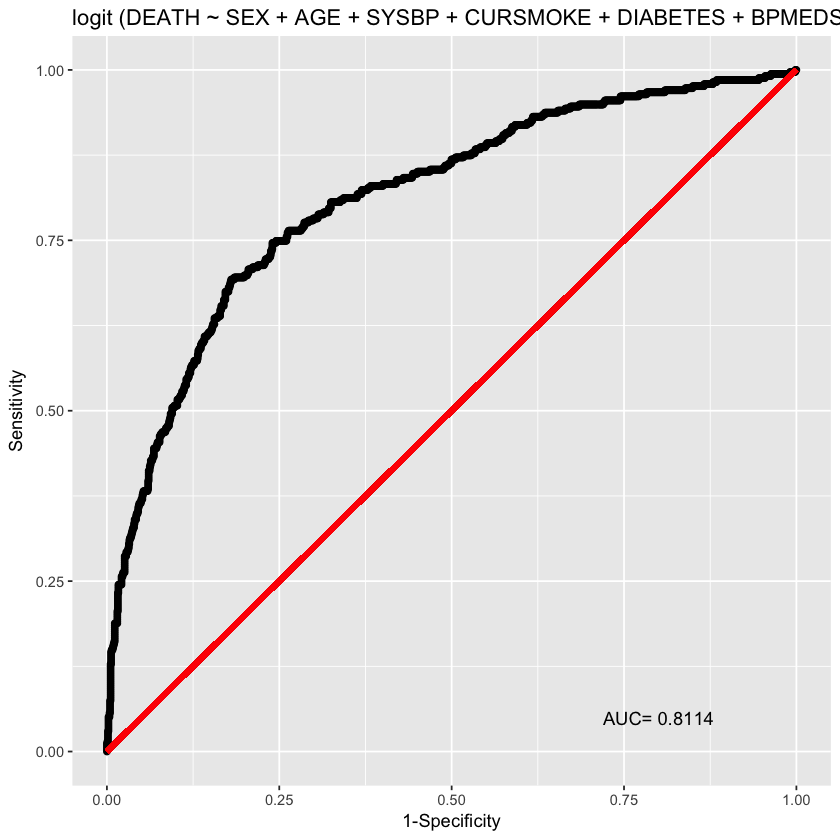

In [57]:
rocplot(backwards1)

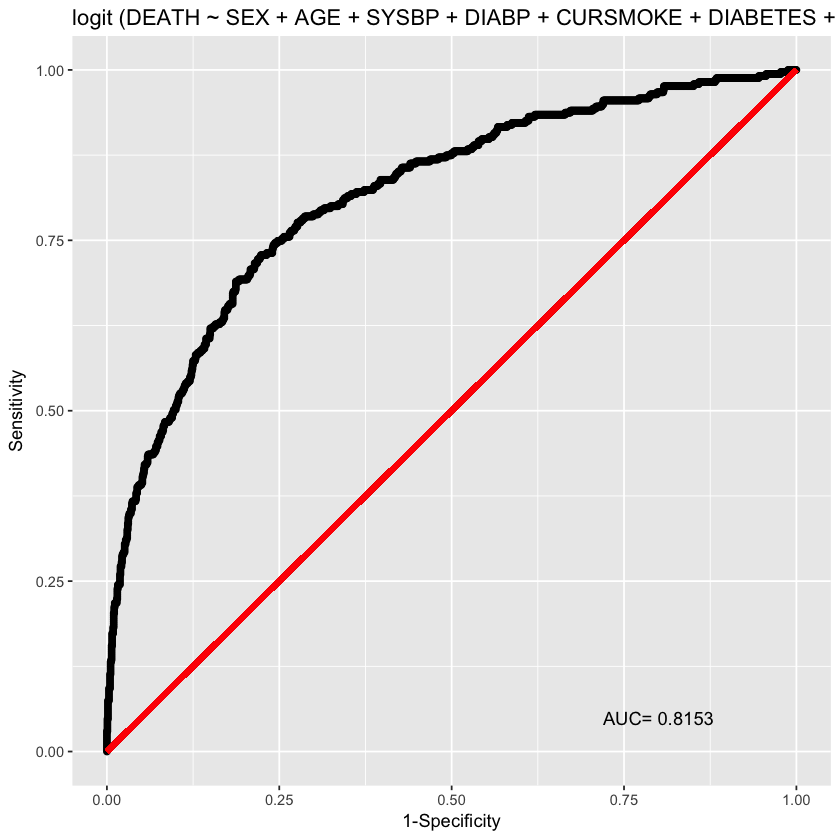

In [58]:
rocplot(backwards2)

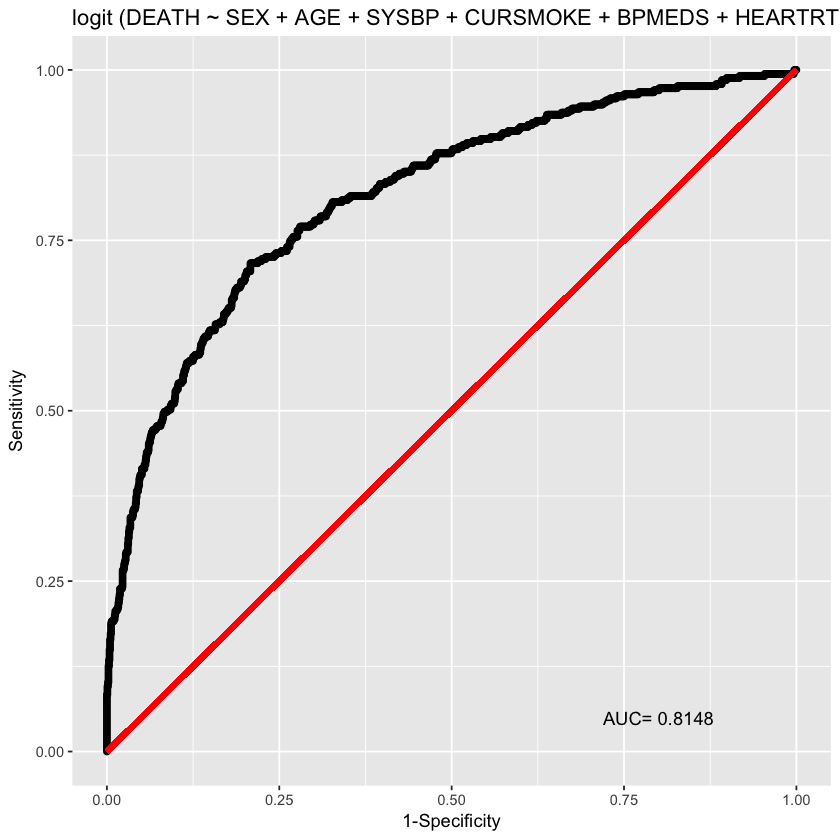

In [59]:
rocplot(backwards3)

In [91]:
Heart.1$prob<-fitted(backwards1,type="response")
Heart.2$prob<-fitted(backwards2,type="response")
Heart.3$prob<-fitted(backwards3,type="response")


In [92]:
table(Heart.1$DEATH, Heart.1$prob > 0.5)
table(Heart.2$DEATH, Heart.2$prob > 0.5)
table(Heart.3$DEATH, Heart.3$prob > 0.5)

   
    FALSE TRUE
  0  1256   65
  1   212  123

   
    FALSE TRUE
  0  1260   61
  1   204  131

   
    FALSE TRUE
  0  1256   65
  1   199  136

Warning message:
“package ‘padoc’ is not available (for R version 3.3.2)”